# Phase D: Full Pipeline Integration Demo

This notebook demonstrates the end-to-end flow of the **Support Layer** for the financial security system.

**Pipeline Steps:**
1.  **Phase A: Generative AI (GANs)** - Train CTGAN on seed data to generate synthetic fraud patterns.
2.  **Phase B: Federated Learning (FL)** - Simulate distributed training of an Autoencoder across 3 banks using the synthetic data.
3.  **Phase C: Explainable AI (XAI)** - Explain the risk scores of the models using SHAP.


## 1. Phase A: Generative AI (GANs)
Generating `synthetic_logins.csv` from `user_logins.csv`...

In [5]:
import os
import sys
# Ensure repo root is in path
sys.path.append(os.path.abspath('..'))

# Run the GAN training script
!python data_generation/train_gan.py

--- Phase A: Generative AI (GANs) ---
1. Loading seed data from g:\Projects\Hackathons\GeeksForGeeks\VITaThon\Finance-Security-Monitoring\research\data\user_logins.csv...
   Converting timestamp to numeric...
2. Training CTGAN (this may take a few minutes)...
3. Generating synthetic data...
4. Saving synthetic data to g:\Projects\Hackathons\GeeksForGeeks\VITaThon\Finance-Security-Monitoring\research\data\synthetic_logins.csv...
✅ Phase A Complete. Synthetic data generated.



  0%|          | 0/5 [00:00<?, ?it/s]
Gen. (0.00) | Discrim. (0.00):   0%|          | 0/5 [00:00<?, ?it/s]
Gen. (2.95) | Discrim. (-0.36):   0%|          | 0/5 [00:12<?, ?it/s]
Gen. (2.95) | Discrim. (-0.36):  20%|██        | 1/5 [00:12<00:49, 12.44s/it]
Gen. (2.78) | Discrim. (-0.81):  20%|██        | 1/5 [00:21<00:49, 12.44s/it]
Gen. (2.78) | Discrim. (-0.81):  40%|████      | 2/5 [00:21<00:31, 10.51s/it]
Gen. (2.36) | Discrim. (0.05):  40%|████      | 2/5 [00:29<00:31, 10.51s/it] 
Gen. (2.36) | Discrim. (0.05):  60%|██████    | 3/5 [00:29<00:18,  9.45s/it]
Gen. (1.79) | Discrim. (0.09):  60%|██████    | 3/5 [00:39<00:18,  9.45s/it]
Gen. (1.79) | Discrim. (0.09):  80%|████████  | 4/5 [00:39<00:09,  9.46s/it]
Gen. (1.61) | Discrim. (0.05):  80%|████████  | 4/5 [00:47<00:09,  9.46s/it]
Gen. (1.61) | Discrim. (0.05): 100%|██████████| 5/5 [00:47<00:00,  9.16s/it]
Gen. (1.61) | Discrim. (0.05): 100%|██████████| 5/5 [00:47<00:00,  9.58s/it]


## 2. Phase B: Federated Learning (FL)
Simulating 3 banks training a global Autoencoder model without sharing raw data.
We use `ray` backend for simulation.

In [6]:
# Set PYTHONPATH to ensure Ray workers can find modules
os.environ['PYTHONPATH'] = os.path.abspath('..')

# Run the FL simulation script
!python phase1/fl_simulation.py

--- Phase B: Federated Learning (FL) Simulation ---
Loading data from g:\Projects\Hackathons\GeeksForGeeks\VITaThon\Finance-Security-Monitoring\research\data\synthetic_logins.csv...
Data partitioned into 3 clients with shapes: [(6667, 4), (6667, 4), (6666, 4)]
Starting FL Simulation...
Saving global model weights for round 1...
Model saved to g:\Projects\Hackathons\GeeksForGeeks\VITaThon\Finance-Security-Monitoring\backend\ml_artifacts\model_autoencoder_federated.h5
Saving global model weights for round 2...
Model saved to g:\Projects\Hackathons\GeeksForGeeks\VITaThon\Finance-Security-Monitoring\backend\ml_artifacts\model_autoencoder_federated.h5
Saving global model weights for round 3...
Model saved to g:\Projects\Hackathons\GeeksForGeeks\VITaThon\Finance-Security-Monitoring\backend\ml_artifacts\model_autoencoder_federated.h5
FL Simulation Complete.


2025-12-03 10:12:17.044986: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-03 10:12:26.419638: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Start

## 3. Phase C: Explainable AI (XAI)
Visualizing why specific transactions were flagged using SHAP force plots.

In [7]:
# Run the Explainability script
!python phase2/explainability.py

--- Phase C: Explainable AI (XAI) ---
1. Loading models...
   Autoencoder weights loaded successfully.
2. Loading data from g:\Projects\Hackathons\GeeksForGeeks\VITaThon\Finance-Security-Monitoring\research\data\synthetic_logins.csv...
3. Generating Explanations...
   Explaining Isolation Forest...
   Saved Isolation Forest explanation to g:\Projects\Hackathons\GeeksForGeeks\VITaThon\Finance-Security-Monitoring\research\output\shap_isolation_forest.png
   Explaining Autoencoder (this may take a moment)...
   Saved Autoencoder explanation to g:\Projects\Hackathons\GeeksForGeeks\VITaThon\Finance-Security-Monitoring\research\output\shap_autoencoder.png
✅ Phase C Complete. Explainability artifacts generated.


2025-12-03 10:14:05.994307: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-03 10:14:09.496065: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
g:\Projects\Hackathons\GeeksForGeeks\VITaThon\Finance-Security-Monitoring\venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mai

### Displaying Generated Explanations

Isolation Forest SHAP Summary:


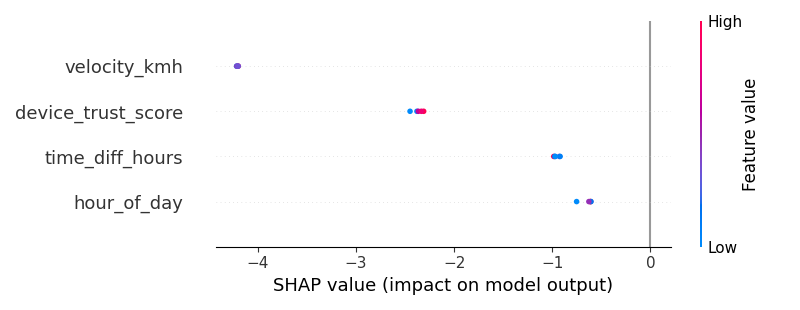


Autoencoder SHAP Summary:


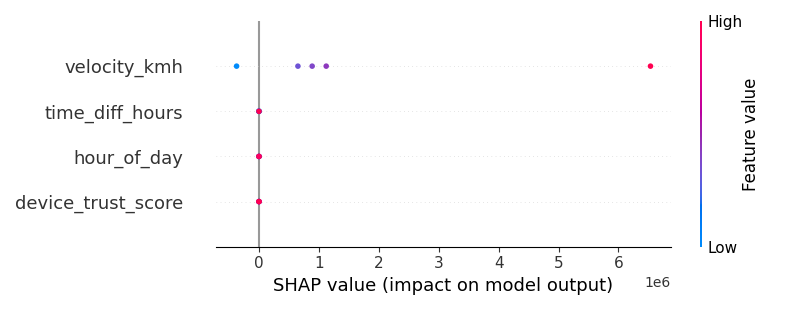

In [8]:
from IPython.display import Image, display

print("Isolation Forest SHAP Summary:")
display(Image(filename='output/shap_isolation_forest.png'))

print("\nAutoencoder SHAP Summary:")
display(Image(filename='output/shap_autoencoder.png'))

## ✅ System Verification Complete
The pipeline successfully generated data, trained a global model via FL, and explained the results.